In [115]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
# remove un wanted columns
df=pd.read_csv('TitanicDataset.csv')
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [117]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [118]:
#replace null in age
df['Age']=df['Age'].fillna(df['Age'].mean())
df=df.dropna()

In [119]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [120]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.881138,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


In [121]:
#encoding sex and embarked columns
df['Sex']=LabelEncoder().fit_transform(df['Sex'])
df['Embarked']=LabelEncoder().fit_transform(df['Embarked'])

In [122]:

df_scalled=StandardScaler().fit_transform(df)

In [123]:
df_scalled=pd.DataFrame(df_scalled,columns=df.columns)
df_scalled.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-0.777446,0.840997,0.742340,-0.609933,0.479763,-0.445612,-0.501949,0.623271
1,1.286263,-1.549301,-1.347091,0.636914,0.479763,-0.445612,0.735501,-1.832210
2,1.286263,0.840997,-1.347091,-0.298221,-0.479763,-0.445612,-0.488905,0.623271
3,1.286263,-1.549301,-1.347091,0.403130,0.479763,-0.445612,0.384107,0.623271
4,-0.777446,0.840997,0.742340,0.403130,-0.479763,-0.445612,-0.486489,0.623271


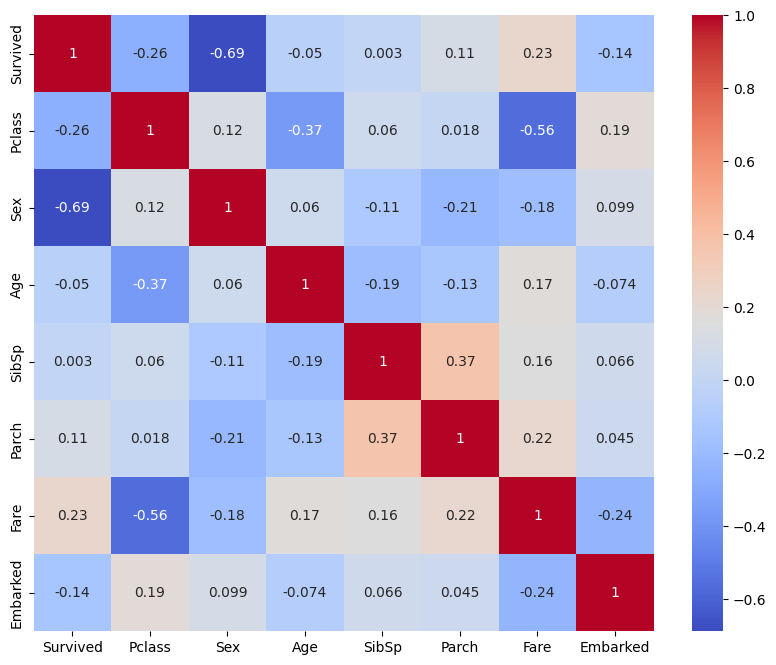

In [124]:

plt.figure(figsize=(10,8))
sns.heatmap(df_scalled.corr(),annot=True,cmap='coolwarm')
plt.show()

In [126]:
# Fare,parch,sibSp,age these factors are more effecting the survivel rate
corr_matrix=df_scalled.corr()
corr_matrix['Survived'].sort_values(ascending=False)


Survived    1.000000
Fare        0.232286
Parch       0.109718
SibSp       0.003032
Age        -0.050453
Embarked   -0.136255
Pclass     -0.262114
Sex        -0.687409
Name: Survived, dtype: float64